# Actividad 3.10 - Predicción de Riesgo de derrumbamiento - Terremotos

El objeto de esta actividad es participar en la competición de ofrecida de la web de DrivenData:
[Richter's Predictor: Modeling Earthquake Damage](https://www.drivendata.org/competitions/57/nepal-earthquake/)


# Descripcion del problema

Estamos tratando de predecir la variable ordinal `damage_grad`, que representa un nivel de daño en el edificio que fue golpeado por el terremoto. Hay 3 grados de daño:

- representa poco daño
- representa una cantidad media de daño
- representa la destrucción casi completa

## Características

El conjunto de datos consiste principalmente en información sobre la estructura de los edificios y su propiedad legal. Cada fila del conjunto de datos representa un edificio específico en la región afectada por el terremoto de Gorkha.

Hay 39 columnas en este conjunto de datos, donde la columna `building_id` es un identificador único y aleatorio. Las 38 funciones restantes se describen en la siguiente sección. Las variables categóricas se ofuscaron con caracteres ascii aleatorios en minúsculas. La aparición del mismo carácter en columnas distintas **no** implica el mismo valor original.

## Descripcion de caracteristicas

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` ***(tipo: int)***: región geográfica en la que existe el edificio, desde el más grande (nivel 1) hasta la subregión más específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.
- `count_floors_pre_eq` ***(type: int)***: número de pisos que tenía el edificio antes del terremoto.
- `edad` ***(tipo: int)***: antigüedad del edificio en años.
- `area_percentage` ***(tipo: int)***: área normalizada de la huella del edificio.
- `porcentaje_altura` ***(tipo: int)***: altura normalizada de la huella del edificio.
- `land_surface_condition` (tipo: categórico): estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n, o, t.
- `foundation_type` ***(tipo: categórico)***: tipo de cimentación utilizada durante la construcción. Valores posibles: h, i, r, u, w.
- `roof_type` ***(tipo: categórico)***: tipo de techo utilizado durante la construcción. Valores posibles: n, q, x.
- `ground_floor_type` ***(tipo: categórico)***: tipo de la planta baja. Valores posibles: f, m, v, x, z.
- `other_floor_type` ***(tipo: categórico)***: tipo de construcciones utilizadas en plantas superiores a la baja (excepto de cubierta). Valores posibles: j, q, s, x.
- `posición` ***(tipo: categórico)***: posición del edificio. Valores posibles: j, o, s, t.
- `plan_configuration` ***(tipo: categórico)***: configuración del plano del edificio. Valores posibles: a, c, d, f, m, n, o, q, s, u.
- `has_superstructure_adobe_mud` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Adobe/Mud.
- `has_superstructure_mud_mortar_stone` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Mud Mortar - Stone.
- `has_superstructure_stone_flag` ***(tipo: binario)***: variable de bandera que indica si la superestructura fue hecha de piedra.
- `tiene_superestructura_cemento_mortero_piedra` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Cemento - Piedra.
- `has_superstructure_mud_mortar_brick` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Barro - Ladrillo.
- `has_superstructure_cement_mortar_brick` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Cemento - Ladrillo.
- `has_superstructure_timber` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Madera.
- `has_superstructure_bamboo` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Bambú.
- `has_superstructure_rc_non_engineered` ***(tipo: binario)***: variable indicadora que indica si la superestructura fue hecha de hormigón armado sin ingeniería.
- `has_superstructure_rc_engineered` ***(tipo: binario)***: variable indicadora que indica si la superestructura fue hecha de hormigón armado de ingeniería.
- `has_superstructure_other` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de algún otro material.
- `legal_ownership_status` ***(tipo: categórico)***: estado legal de propiedad del terreno donde se construyó la edificación. Valores posibles: a, r, v, w.
- `count_families` ***(type: int)***: número de familias que viven en el edificio.
- `has_secondary_use` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó para algún propósito secundario.
- `has_secondary_use_agriculture` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó con fines agrícolas.
- `has_secondary_use_hotel` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como hotel.
- `has_secondary_use_rental` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó para fines de alquiler.
- `has_secondary_use_institution` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como sede de alguna institución.
- `has_secondary_use_school` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como escuela.
- `has_secondary_use_industry` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado para fines industriales.
- `has_secondary_use_health_post` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como puesto de salud.
- `has_secondary_use_gov_office` ***(tipo: binario)***: variable indicadora que indica si el edificio fue utilizado como oficina gubernamental.
- `has_secondary_use_use_police` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como comisaría.
- `has_secondary_use_other` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó secundariamente para otros fines.


# Obtencion de los datos

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv('./data/train_values.csv')
y_train = pd.read_csv('./data/train_labels.csv')
X_test = pd.read_csv('./data/test_values.csv')

In [3]:
X_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = y_train['damage_grade']

In [5]:
X_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


# Normalizacion de los datos

Es necesario transformar los datos que no sean numéricos para poder realizar la matriz de correlación y entrenar nuestro modelo.

## X_train

In [6]:
# Limpieza de datos: eliminar registros duplicados y reemplazar valores faltantes
X_train.drop_duplicates(inplace=True)
X_train.fillna(0, inplace=True)

# Obtenemos las columnas que no sean ya numericos
X_columns = X_train.select_dtypes(exclude='int').columns

# Iteramos sobre cada columna y realizamos la conversión a valores numéricos enteros
for i in X_columns:
    # Obtenemos la lista de valores únicos en la columna i
    data = X_train[i].unique().tolist()
    # Reemplazamos cada valor en la columna i con su correspondiente valor numérico entero
    X_train[i] = X_train[i].replace(data, list(range(len(data))))

X_train.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

## X_test

In [7]:
# Limpieza de datos: eliminar registros duplicados y reemplazar valores faltantes
X_test.drop_duplicates(inplace=True)
X_test.fillna(0, inplace=True)

# Obtenemos las columnas que no sean ya numericos
X_columns = X_test.select_dtypes(exclude='int').columns

# Iteramos sobre cada columna y realizamos la conversión a valores numéricos enteros
for i in X_columns:
    # Obtenemos la lista de valores únicos en la columna i
    data = X_test[i].unique().tolist()
    # Reemplazamos cada valor en la columna i con su correspondiente valor numérico entero
    X_test[i] = X_test[i].replace(data, list(range(len(data))))

X_test.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

In [8]:
from sklearn.preprocessing import MaxAbsScaler

#Escalamos los datos
scaler = MaxAbsScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)

# Visualizacion de datos

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

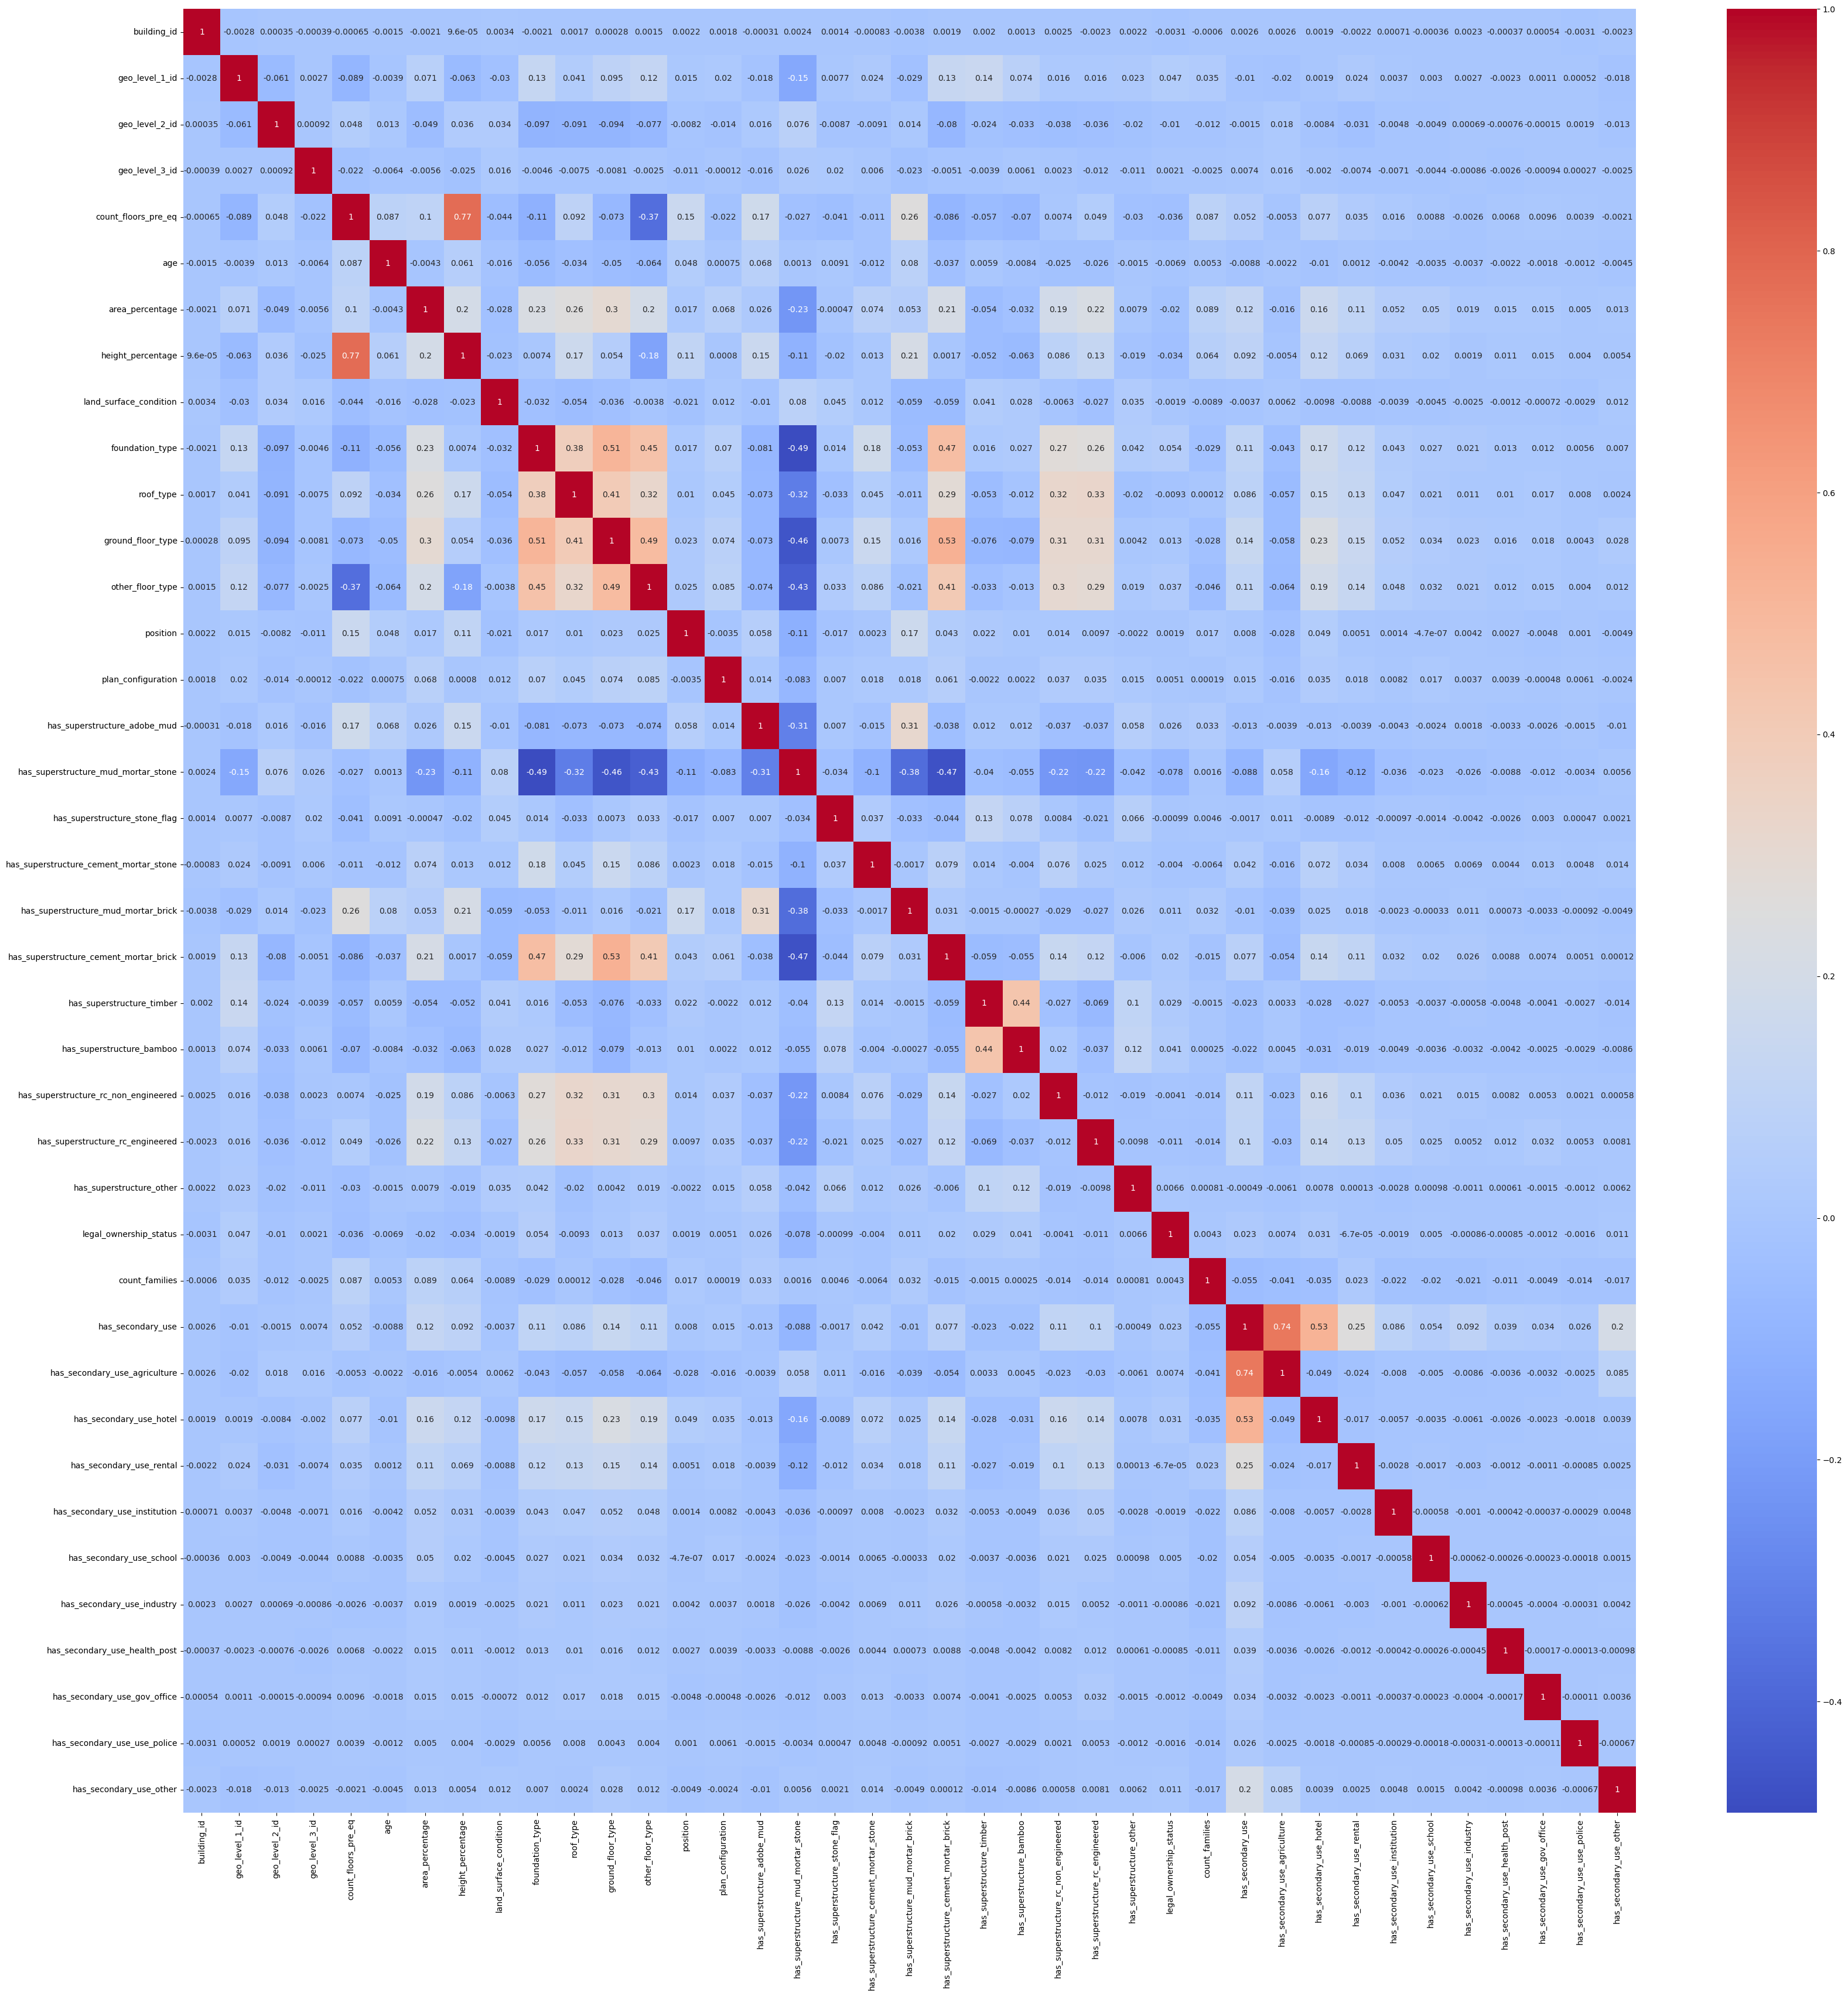

In [10]:
# Matriz de correlación
fig, ax = plt.subplots(figsize=(40,40))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Entrenamiento de modelos

## Modelo 1 KNN

**PARAMETTOS**
- `n_neighbors` : Este parámetro indica la cantidad de vecinos más cercanos que se utilizarán para realizar las predicciones. Los valores posibles son números enteros positivos. Los valores más comunes suelen ser impares para evitar empates.
- `weights` : Este parámetro indica el método de ponderación de los vecinos más cercanos. Los valores posibles son 'uniform', donde todos los vecinos tienen el mismo peso, y 'distance', donde los vecinos más cercanos tienen un peso mayor que los vecinos más lejanos.
- `algorithm` : Este parámetro indica el algoritmo a utilizar para realizar la búsqueda de vecinos más cercanos. Los valores posibles son 'auto', 'ball_tree', 'kd_tree' y 'brute'. 'auto' selecciona el mejor algoritmo en función de los datos de entrada, mientras que los otros valores especifican el algoritmo de búsqueda de vecinos más cercanos a utilizar.
- `leaf_size` : Este parámetro se utiliza en los algoritmos 'ball_tree' y 'kd_tree' y especifica el tamaño de hoja del árbol. Valores más grandes pueden resultar en un tiempo de entrenamiento más corto, pero también pueden reducir la precisión del modelo.
- `p` : Este parámetro indica la métrica de distancia a utilizar. El valor predeterminado es 2 (distancia euclidiana), pero también se puede usar la distancia de Manhattan (p = 1) o la distancia de Minkowski (p> 2).
- `metric` : Este parámetro indica la métrica de distancia a utilizar. Los valores posibles son 'euclidean', 'manhattan' y 'minkowski'. 'euclidean' es la distancia euclidiana, 'manhattan' es la distancia de Manhattan y 'minkowski' es una generalización de las dos primeras que se controla mediante el parámetro p.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Definir los hiperparámetros a explorar en el modelo
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear un objeto KNeighborsClassifier y aplicar la búsqueda aleatoria de hiperparámetros
knc = KNeighborsClassifier()
random_knc = RandomizedSearchCV(estimator=knc, param_distributions=params, cv=5, random_state=0)
random_knc.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo obtenido
predY = random_knc.best_estimator_.predict(X_test)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(y_train, predY, average='micro', labels=[1,2,3])

# Imprimir los mejores parámetros encontrados y el F1 score obtenido
print(f'Los mejores parametros: \n{random_knc.best_estimator_} \n F1 score -> {score}')

## Model 2 SVM

**PARAMETTOS**
- `C` : Parámetro de regularización. Cuanto mayor es `C`, menor es la regularización. Valores altos pueden conducir a overfitting.
- `kernel` : Especifica el kernel a ser utilizado en el modelo. Las opciones son `linear`, `poly`, `rbf` y `sigmoid`.
- `degree` : Grado de la función de kernel polinómico. Solo es considerado si `kernel` es `poly`.
- `gamma` : Coeficiente del kernel. Solo es considerado para `rbf`, `poly` y `sigmoid`. `gamma='scale'` (predeterminado) es 1 / (n_features * X.var()) y `gamma='auto'` utiliza 1 / n_features. También se puede especificar un valor numérico.
- `shrinking` : Si se utiliza la heurística de contracción para acelerar el entrenamiento. Los valores posibles son `True` y `False`.
- `decision_function_shape` : Especifica cómo combinar las decisiones de múltiples clases. `ovo` (uno contra uno) o `ovr` (uno contra el resto).
- `break_ties` : Si es verdadero, `decision_function_shape='ovr'` y dos o más clases tienen valores de decisión iguales, entonces la decisión se determina por el primer clasificador. Si es falso, se utiliza la clasificación predict_proba.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr'],
    'break_ties': [True, False]
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
svm = SVC()
random_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, cv=5, random_state=0)
random_svm.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo obtenido
predY = random_svm.best_estimator_.predict(X_test)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(y_train, predY, average='micro', labels=[1,2,3])

# Evaluar el modelo mediante el cálculo del F1 score
print(f'Los mejores parametros: \n{random_svm.best_estimator_} \n F1 score -> {score}')